# Connecting to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Required Libraries

In [2]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import numpy as np
import pandas as pd
import os
import shutil
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Setting Configuration Parameters

In [3]:
training_path  = "/content/drive/MyDrive/Data/Final_Set/train_test_split/train"
validation_path  = "/content/drive/MyDrive/Data/Final_Set/train_test_split/validation"
testing_path   = "/content/drive/MyDrive/Data/Final_Set/train_test_split/test"

# Data Augmentation

In [4]:
training_data_generator = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

training = training_data_generator.flow_from_directory(directory=training_path, 
                                           target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [5]:
validation_data_generator = ImageDataGenerator(preprocessing_function= preprocess_input  )

validation = validation_data_generator.flow_from_directory(directory=validation_path, 
                                                target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [6]:
testing_data_generator = ImageDataGenerator(preprocessing_function= preprocess_input )

testing = testing_data_generator.flow_from_directory(directory=testing_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 800 images belonging to 2 classes.


# Model Creation

In [34]:
class_type = {0:'Covid', 1:'Normal'}

In [35]:
INIT_LR = 1e-1

In [36]:
bModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
hModel = bModel.output
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(2, activation="sigmoid", kernel_initializer='glorot_uniform')(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [37]:
#model.summary()

In [38]:
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 5, verbose=1)
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/Data/Trial_Model/Covid_model_5.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [39]:
opt = Adam(lr=INIT_LR)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [40]:
model.compile(optimizer=opt , loss = 'categorical_crossentropy', metrics=['accuracy'])
print("Compiling Starts")
hist = model.fit_generator(training, steps_per_epoch= 10, epochs= 30, validation_data= validation , validation_steps= 16, callbacks=[es,mc])

Compiling Starts


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 78s 7s/step - loss: 1028.1581 - accuracy: 0.6000 - val_loss: 1187.6273 - val_accuracy: 0.6113

Epoch 00001: val_accuracy improved from -inf to 0.61133, saving model to /content/drive/MyDrive/Data/Trial_Model/Covid_model_5.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
10/10 [==============================] - 69s 7s/step - loss: 623.4247 - accuracy: 0.7625 - val_loss: 308.2332 - val_accuracy: 0.8438

Epoch 00002: val_accuracy improved from 0.61133 to 0.84375, saving model to /content/drive/MyDrive/Data/Trial_Model/Covid_model_5.h5
Epoch 3/30
10/10 [==============================] - 68s 7s/step - loss: 385.6270 - accuracy: 0.8344 - val_loss: 295.7294 - val_accuracy: 0.8535

Epoch 00003: val_accuracy improved from 0.84375 to 0.85352, saving model to /content/drive/MyDrive/Data/Trial_Model/Covid_model_5.h5
Epoch 4/30
10/10 [==============================] - 69s 7s/step - loss: 345.5038 - accuracy: 0.8500 - val_loss: 606.4498 - val_accuracy: 0.7910

Epoch 00004: val_accuracy did not improve from 0.85352
Epoch 5/30
10/10 [==============================] - 57s 6s/step - loss: 316.7279 - accuracy: 0.8156 - val_loss: 271.9153 - val_accuracy: 0.8672

Epoch 00005: val_accuracy improved from 0.85352 to 0.86719, saving model to /content/drive/MyDrive/

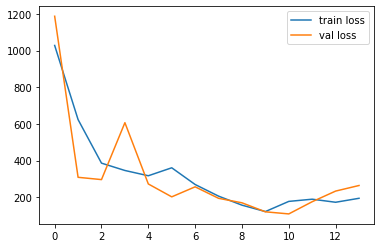

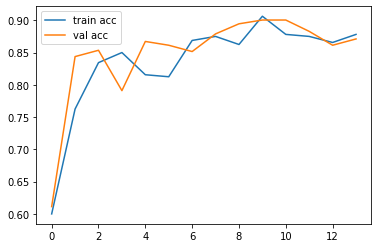

In [41]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Testing the Model

## Using Test set

In [42]:
import tensorflow as tf 

model = tf.keras.models.load_model('/content/drive/MyDrive/Data/Trial_Model/Covid_model_5.h5')

In [43]:
y_test=testing.classes

In [44]:
results=model.predict(testing)
results = np.argmax(results, axis=1)

In [45]:
acc = model.evaluate(testing)[1] 

print(f"The accuracy of your model is = {acc*100} %")

25/25 [==============================] - 7s 237ms/step - loss: 95.8742 - accuracy: 0.9125
The accuracy of your model is = 91.25000238418579 %


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,results,target_names=['Covid','Normal']))

              precision    recall  f1-score   support

       Covid       0.92      0.94      0.93       500
      Normal       0.90      0.86      0.88       300

    accuracy                           0.91       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.91      0.91      0.91       800



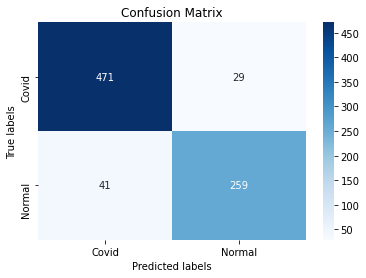

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, results)

ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".0f")

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

## Using image from an external source

In [48]:
def get_img_array(img_path):
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type : Covid

The chances of image being Covid is : 100.0 %

The chances of image being Normal is : 0.0%


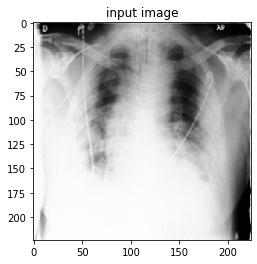

In [49]:
path = "/content/drive/MyDrive/Data/Final_Set/train_test_split/test/Covid/COVID-510.png"

img = get_img_array(path)

result = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type : {result}")
print()
print(f"The chances of image being Covid is : {round(model.predict(img)[0][0]*100,2)} %")
print()
print(f"The chances of image being Normal is : {round(model.predict(img)[0][1]*100,2) }%")
 
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()